In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def displacement(FPn,FPtype):
    x=24.324744
    y=12.399260
    z=11.812478
    dfFP=pd.DataFrame()
    dfDFT=pd.DataFrame()
    dfFP=pd.read_csv('data.FP{}'.format(FPn),skiprows=11,sep=' ',nrows=320,header=None)
    dfDFT=pd.read_csv('data.DFT{}'.format(FPn),skiprows=11,sep=' ',nrows=320,header=None)
    dis=dfDFT-dfFP
    dis = dis.drop(columns=[0,1])
    dis = dis.rename(columns={2:'x',3:'y',4:'z'})
    for i in range(320):
        if abs(dis.x[i])+3>x:
            if dis.x[i]>0:
                dis.x[i]=dis.x[i]-x
            else:
                dis.x[i]=dis.x[i]+x
        if abs(dis.y[i])+3>y:
            if dis.y[i]>0:
                dis.y[i]=dis.y[i]-y
            else:
                dis.y[i]=dis.y[i]+y
        if abs(dis.z[i])+3>z:
            if dis.z[i]>0:
                dis.z[i]=dis.z[i]-z
            else :
                dis.z[i]=dis.z[i]+z
    dis['dis']=np.sqrt(dis.x**2+dis.y**2+dis.z**2)
    #print(dis['dis'].describe())
    plt.hist(dis.dis,50, density=True,label='{}'.format(FPn)+' ' +FPtype)
    plt.xlabel('Displacement distance, ($\AA$)')
    #plt.ylabel('Atoms number')
    return dis


20     index         x         y         z       dis
65     65  1.855195  3.078412  0.190242  3.599245
20 ParticleIdentifier==66||
30      index         x         y         z   5   6   7       dis
101    101 -0.116937 -1.285329  1.592547 NaN NaN NaN  2.049867
30 ParticleIdentifier==102||
90     index         x         y         z       dis
93     93 -0.032398 -0.379678 -2.579878  2.607868
90 ParticleIdentifier==94||
95      index         x         y        z  5  6  7       dis
104    104 -0.198549  1.433945  1.51561  0  0  0  2.095875
95 ParticleIdentifier==105||


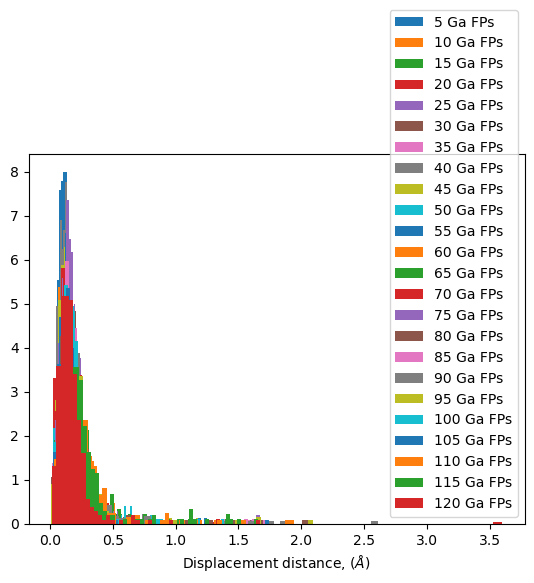

In [52]:
path='/Users/ruhe/Desktop/ga2o3/FP/DFT/Ga'
os.chdir(path)
for FPn in range(5, 121, 5):
    dis=displacement(FPn,'Ga FPs')
    dis =  dis.reset_index()
    if len(dis[dis.dis>2])>0:
        print(FPn,dis[dis.dis>2])
        expre=''
        for i in dis[dis.dis>2].index:
            expre=expre+'ParticleIdentifier=='+ str(i+1) + '||' 
        print(FPn, expre)
plt.legend()

15      index         x         y         z       dis
156    156  1.928609 -1.602594  1.770147  3.069407
160    160  1.760612 -1.517008 -1.319609  2.672533
15 ParticleIdentifier==157||ParticleIdentifier==161||
55      index         x         y         z       dis
162    162 -2.273314  1.363736 -1.378619  2.988029
182    182 -0.201491  1.638992 -2.285517  2.819660
185    185 -2.056318 -1.669567 -1.554912  3.071424
55 ParticleIdentifier==163||ParticleIdentifier==183||ParticleIdentifier==186||
70      index         x         y         z       dis
246    246  1.822173 -1.084011 -1.463467  2.576263
258    258  1.803955  1.646360 -1.409606  2.819884
70 ParticleIdentifier==247||ParticleIdentifier==259||
75      index         x         y         z       dis
284    284  1.853112 -1.410878  1.456802  2.747157
296    296  1.882073 -1.161819  0.851826  2.370154
75 ParticleIdentifier==285||ParticleIdentifier==297||
80      index         x         y         z       dis
230    230  1.628750  1.665292

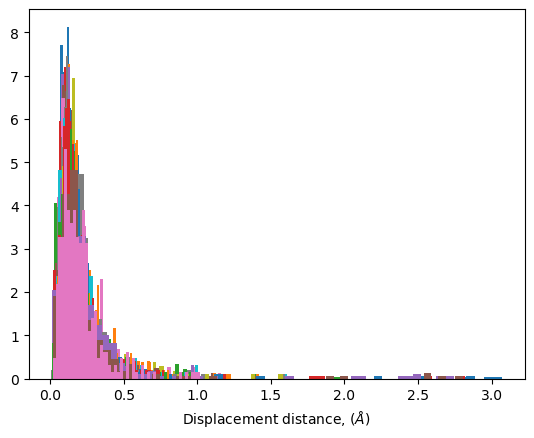

In [51]:
path='/Users/ruhe/Desktop/ga2o3/FP/DFT/O'
os.chdir(path)
for FPn in range(5, 136, 5):
    dis=displacement(FPn,'O FPs')
    dis =  dis.reset_index()
    if len(dis[dis.dis>2])>0:
        print(FPn,dis[dis.dis>2])
        expre=''
        for i in dis[dis.dis>2].index:
            expre=expre+'ParticleIdentifier=='+ str(i+1) + '||' 
        print(FPn, expre)

5 Empty DataFrame
Columns: [x, y, z, dis]
Index: []
10 Empty DataFrame
Columns: [x, y, z, dis]
Index: []
15 Empty DataFrame
Columns: [x, y, z, dis]
Index: []
20            x         y        z  5  6  7       dis
86  2.523823  1.355414  0.46051  0  0  0  2.901534
25 Empty DataFrame
Columns: [x, y, z, 5, 6, 7, dis]
Index: []
30 Empty DataFrame
Columns: [x, y, z, dis]
Index: []
35 Empty DataFrame
Columns: [x, y, z, dis]
Index: []
40 Empty DataFrame
Columns: [x, y, z, 5, 6, 7, dis]
Index: []
45 Empty DataFrame
Columns: [x, y, z, dis]
Index: []
50 Empty DataFrame
Columns: [x, y, z, 5, 6, 7, dis]
Index: []
55            x         y         z   5   6   7       dis
191  1.52925 -0.993888 -0.986546 NaN NaN NaN  2.073569
60 Empty DataFrame
Columns: [x, y, z, dis]
Index: []
65 Empty DataFrame
Columns: [x, y, z, dis]
Index: []
70             x         y         z  5  6  7       dis
240 -1.303559  2.060417  0.449384  0  0  0  2.479219
75 Empty DataFrame
Columns: [x, y, z, 5, 6, 7, dis]
Index: []
80

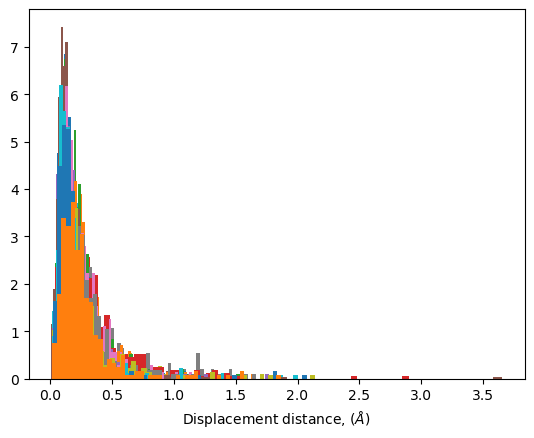

In [31]:
path='/Users/ruhe/Desktop/ga2o3/FP/DFT/mix'
os.chdir(path)
for FPn in range(5, 111, 5):
    dis=displacement(FPn,'mix FPs')
    print(FPn,dis[dis.dis>2])
#plt.legend()
#print(dis[dis.dis>1])